# Chapter 6
## Uploading Streaming and Sampling Data
## Uploading small amounts of data into memory

In [1]:
with open("Colors.txt", 'r') as open_file:
 print('Colors.txt content:\n' + open_file.read())

Colors.txt content:
Color	Value
Red	1
Orange	2
Yellow	3
Green	4
Blue	5
Purple	6
Black	7
White	8


In [3]:
with open("Colors.txt", 'r') as open_file:
    for observation in open_file:
         print('Reading Data: ' + observation)

Reading Data: Color	Value

Reading Data: Red	1

Reading Data: Orange	2

Reading Data: Yellow	3

Reading Data: Green	4

Reading Data: Blue	5

Reading Data: Purple	6

Reading Data: Black	7

Reading Data: White	8


## Generating variations of image data

(100, 100, 3)
30000


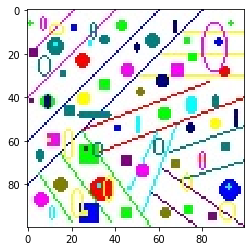

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
image = img.imread("Colorblk.jpg")
print(image.shape)
print(image.size)
plt.imshow(image)
plt.show()

In [17]:
from random import random
sample_size = 0.25
with open("Colors.txt", 'r') as open_file:
     for j, observation in enumerate(open_file):
         if random()<=sample_size:
             print('Reading Line: ' + str(j) +
                 ' Content: ' + observation)

Reading Line: 0 Content: Color	Value

Reading Line: 4 Content: Green	4



## Sampling data in different ways

In [21]:
n = 2
with open("Colors.txt", 'r') as open_file:
    for j, observation in enumerate(open_file):
        if j % n==0:
            print('Reading Line: ' + str(j) +
                 ' Content: ' + observation)

Reading Line: 0 Content: Color	Value

Reading Line: 2 Content: Orange	2

Reading Line: 4 Content: Green	4

Reading Line: 6 Content: Purple	6

Reading Line: 8 Content: White	8


In [22]:
from random import random
sample_size = 0.25
with open("Colors.txt", 'r') as open_file:
    for j, observation in enumerate(open_file):
        if random()<=sample_size:
            print('Reading Line: ' + str(j) +
                ' Content: ' + observation)


Reading Line: 1 Content: Red	1

Reading Line: 4 Content: Green	4



# Accessing Data in Structured Flat-File Form

## Reading from a text file

In [23]:
import pandas as pd
color_table = pd.io.parsers.read_table("Colors.txt")
print(color_table)


    Color  Value
0     Red      1
1  Orange      2
2  Yellow      3
3   Green      4
4    Blue      5
5  Purple      6
6   Black      7
7   White      8


## Reading CSV delimited format

In [24]:
import pandas as pd
titanic = pd.io.parsers.read_csv("Titanic.csv")
X = titanic[['age']]
print(X)

            age
0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
...         ...
1304    14.5000
1305  9999.0000
1306    26.5000
1307    27.0000
1308    29.0000

[1309 rows x 1 columns]


In [25]:
X = titanic[['age']].values
print(X)

[[29.        ]
 [ 0.91670001]
 [ 2.        ]
 ...
 [26.5       ]
 [27.        ]
 [29.        ]]


## Reading Excel and other Microsoft Office files

In [27]:
import pandas as pd
xls = pd.ExcelFile("Values.xls")
trig_values = xls.parse('Sheet1', index_col=None,
 na_values=['NA'])
print(trig_values)

    Angle (Degrees)      Sine    Cosine    Tangent
0        138.550574  0.661959 -0.749540  -0.883153
1        305.535745 -0.813753  0.581211  -1.400100
2        280.518695 -0.983195  0.182556  -5.385709
3        216.363795 -0.592910 -0.805269   0.736289
4         36.389247  0.593268  0.805005   0.736974
..              ...       ...       ...        ...
67       324.199562 -0.584964  0.811059  -0.721234
68       187.948172 -0.138277 -0.990394   0.139619
69       270.678249 -0.999930  0.011837 -84.472139
70       270.779159 -0.999908  0.013598 -73.530885
71       200.213513 -0.345520 -0.938412   0.368196

[72 rows x 4 columns]


## Sending Data in Unstructured File Form

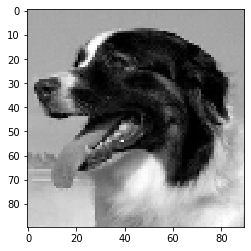

In [30]:
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
import matplotlib.cm as cm
example_file = ("http://upload.wikimedia.org/" +
 "wikipedia/commons/7/7d/Dog_face.png")
image = imread(example_file, as_gray=True)
plt.imshow(image, cmap=cm.gray)
plt.show()


In [31]:
print("data type: %s, shape: %s" %
 (type(image), image.shape))

data type: <class 'numpy.ndarray'>, shape: (90, 90)


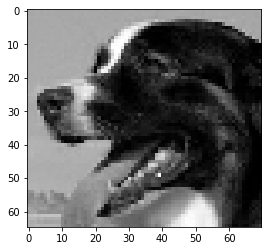

In [32]:
image2 = image[5:70,0:70]
plt.imshow(image2, cmap=cm.gray)
plt.show()

data type: <class 'numpy.ndarray'>, shape: (30, 30)


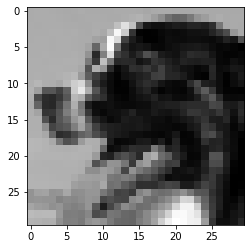

In [33]:
image3 = resize(image2, (30, 30), mode='symmetric')
plt.imshow(image3, cmap=cm.gray)
print("data type: %s, shape: %s" %
 (type(image3), image3.shape))

In [34]:
image_row = image3.flatten()
print("data type: %s, shape: %s" %
 (type(image_row), image_row.shape))


data type: <class 'numpy.ndarray'>, shape: (900,)


## Managing Data from Relational Databases

In [36]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')


## Accessing Data from the Web

In [39]:
from lxml import objectify
import pandas as pd
xml = objectify.parse(open('XMLData.xml'))
root = xml.getroot()
df = pd.DataFrame(columns=('Number', 'String', 'Boolean'))
for i in range(0,4):
    obj = root.getchildren()[i].getchildren()
    row = dict(zip(['Number', 'String', 'Boolean'],
            [obj[0].text, obj[1].text,
            obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)
    
print(df)

  Number  String Boolean
0      1   First    True
1      2  Second   False
2      3   Third    True
3      4  Fourth   False


# Leasons Learned 
## Python Installation 

### La instalación de Python no mostró mayor compliación. Al seguir los pasos determinados por el plan de ataque fue sencillo instalar todas las librerías necesrias para completar los ejercicios del Capítulo 5 y 6 del libro en estudio. Jupyter Notebooks también es muy claro al mostrar los errores y muestra la instalación de paquetes faltantes en los casos en donde se necesite un paquete que no se encuentre instalado en el sistema. 

### Una vez instalado Jupyter Notebook y abrirlo en la web, es sencillo manejar las celdas y poder observar los resultdos bajo cada código. Este tiene una funcionalidad muy similar al Notebook de RStudio con el que se ha trabajado en los últimos entregables. 

### El tutorial de Python es una buena introducción a las variables, creación de funciones y ejecución de código sencillo. Cabe destacar que la web provee grandes apollos como StackOverflow en donde también se pueden hacer búsquedas en el futuro para troubleshooting o incluso para buscar problemas similares y entender como resolverlos. 

### Es importante mantener el orden al generar código en Python dado que es un lenguaje de programación que depende de la indentación, mientras que otros programas se guían por signos como el punto y coma o el abrir y cerrar de una llave. 

### Estos capítulos y ejercicios apenas enseñan un poco de la utilidad de Jupyter Notebooks y en siguientes trabajos se podría explorar como sacar el mejor provecho de la paltaforma. 

### GitHub es una plataforma que conozco desde hace unos años y aunque tengo mucho tiempo de no utilizarla fue sencillo volver a abrirla y crear un repositorio nuevo en donde compartir los resultados de este entregable.